# Optimize energy surface of a cluster with two water molecules

In [1]:
# Create the path (PYTHONPATH) to modules, assuming that the 'amcess' directory is in the parent directory
import os
import sys
module_path = os.path.abspath(os.path.join('..'))

if module_path not in sys.path:
    sys.path.append(module_path)

In [2]:
from amcess.base_molecule import Cluster
from amcess.search_configuration import SearchConfig
import py3Dmol

In [3]:
# We define a water dimer
water = [("O", 0, 0, 0.1173), ("H", 0, 0.7572, -0.4692), ("H", 0, -0.7572, -0.4692)]
water_dimer = Cluster(water, water)
water_dimer = water_dimer.initialize_cluster(max_closeness=2.976)

In [4]:
xyzfile_bayesian = 'configurations.xyz'
# Define a search configuration method to optimize the Energy of Cluster DHF using Bayesian Optimization (Gaussian Processes) 
SC_bayesian = SearchConfig(water_dimer, search_methodology='Bayesian', basis='6-31G(2df,p)', outxyz=xyzfile_bayesian)
# Define number of initial evaluations and maximum number of iterations
SC_bayesian.run(initer=4, maxiter=8)
print(f'Minima found: {SC_bayesian._search.fun} Hartree')



*** Cost function is Hartree--Fock implemented into pyscf ***


*** Minimization: Bayesian ***
Accept 2
Accept 1
Accept 2
Accept 2
Accept 2
Accept 1
Accept 2
Accept 2
Accept 2
Accept 1
Accept 1
Accept 2
Accept 2
Accept 1
Accept 2
Accept 2
Accept 1
Accept 2
Accept 1
Accept 2
Accept 1
Accept 1
Accept 1
Accept 2
Accept 1
Accept 2
Accept 1
Accept 2
Accept 1
Accept 2
Accept 1
Accept 2
Accept 1
Accept 1
Accept 2
Accept 2
Accept 2
Accept 1
Accept 2
Accept 2
Accept 1
Accept 1
Accept 1
Accept 2
Accept 1
Accept 2
Accept 1
Accept 1
Minima found: -152.05389520349723 Hartree


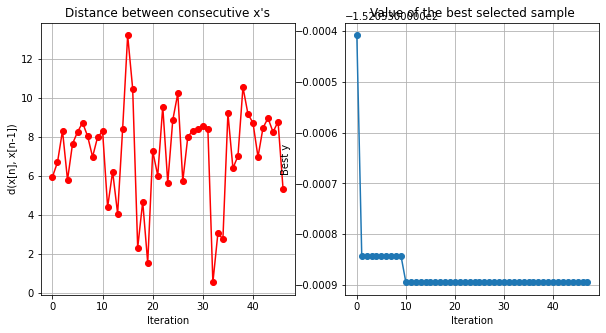

In [5]:
SC_bayesian._search.plot_convergence()

In [8]:
# read calculations and convert them to a single string to plot
water_xyz = ""
with open(xyzfile_bayesian, 'r') as f:
    lines = f.readlines()
    for line in lines:
        water_xyz += line

# 20% to check visually that everything is inside
sr = SC_bayesian.sphere_radius * 1.2

# sphere center
cx, cy, cz = SC_bayesian.sphere_center
sc = {"x": cx, "y": cy, "z": cz}

# axes
x_axis = {'start': {'x': cx-sr, 'y':cy, 'z':cz}, 'end': {'x': cx+sr, 'y':cy, 'z':cz}}
y_axis = {'start': {'x': cx, 'y':cy-sr, 'z':cz}, 'end': {'x': cx, 'y':cy+sr, 'z':cz}}
z_axis = {'start': {'x': cx, 'y':cy, 'z':cz-sr}, 'end': {'x': cx, 'y':cy, 'z':cz+sr}}

# starting visualization
xyz_view = py3Dmol.view(width=700, height=500)#, linked=False, viewergrid=(2,2))
xyz_view.addModelsAsFrames(water_xyz,'xyz')
# xyz_view.setStyle({'stick': {}})
xyz_view.setStyle({'sphere': {'radius': 0.8}})
xyz_view.addSphere({'center': sc, 
        'radius': sr, 
        'color' :'yellow',
        'alpha': 0.5,
        })

# animation base on several XYZ coordinates snapshots
xyz_view.animate({'loop': "forward", 'speed': 0.01, 'reps': 1})

# cartesian 3D axes
xyz_view.addLine(x_axis)
xyz_view.addLine(y_axis)
xyz_view.addLine(z_axis)

xyz_view.addLabel("x", {
        'position':x_axis["end"],
        'inFront':'true',
        'fontSize':20,
        'showBackground':'false',
        'fontColor': 'black',
        })
xyz_view.addLabel("y", {
        'position':y_axis["end"],
        'inFront':'true',
        'fontSize':20,
        'showBackground':'false',
        'fontColor': 'black',
        })
xyz_view.addLabel("z", {
        'position':z_axis["end"],
        'inFront':'true',
        'fontSize':20,
        'showBackground':'false',
        'fontColor': 'black',
        })

xyz_view.zoomTo()
xyz_view.show()


You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [20]:
SC_bayesian.system_object.coordinates

[(0.0, 0.0, 0.1173),
 (0.0, 0.7572, -0.46920000000000006),
 (0.0, -0.7572, -0.46920000000000006),
 (-1.5728517435291403, 2.1445491043537137, 2.676717282831052),
 (-1.1478103388851475, 2.4776922901603577, 1.8857119022622082),
 (-1.28330253881906, 1.233692998744178, 2.738656793045377)]